In [2]:
%pip install neuralforecast
%pip install tsfresh
%pip install seaborn
%pip install tsfeatures

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [71]:
import pandas as pd
import matplotlib.pyplot as plt


gen_1=pd.read_csv('data/Kaggle_solar/Plant_1_Generation_Data.csv')
gen_1.drop('PLANT_ID', axis=1)
sens_1= pd.read_csv('data/Kaggle_solar/Plant_1_Weather_Sensor_Data.csv')
sens_1.drop('PLANT_ID',axis=1)
#format datetime
gen_1['DATE_TIME']= pd.to_datetime(gen_1['DATE_TIME'],format='%d-%m-%Y %H:%M')
sens_1['DATE_TIME']= pd.to_datetime(sens_1['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')


In [72]:
gen_1.head(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
5,2020-05-15,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
6,2020-05-15,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
7,2020-05-15,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
8,2020-05-15,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0
9,2020-05-15,4135001,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0


In [99]:
merged_df = pd.merge(gen_1, sens_1, on='DATE_TIME')
merged_df

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0


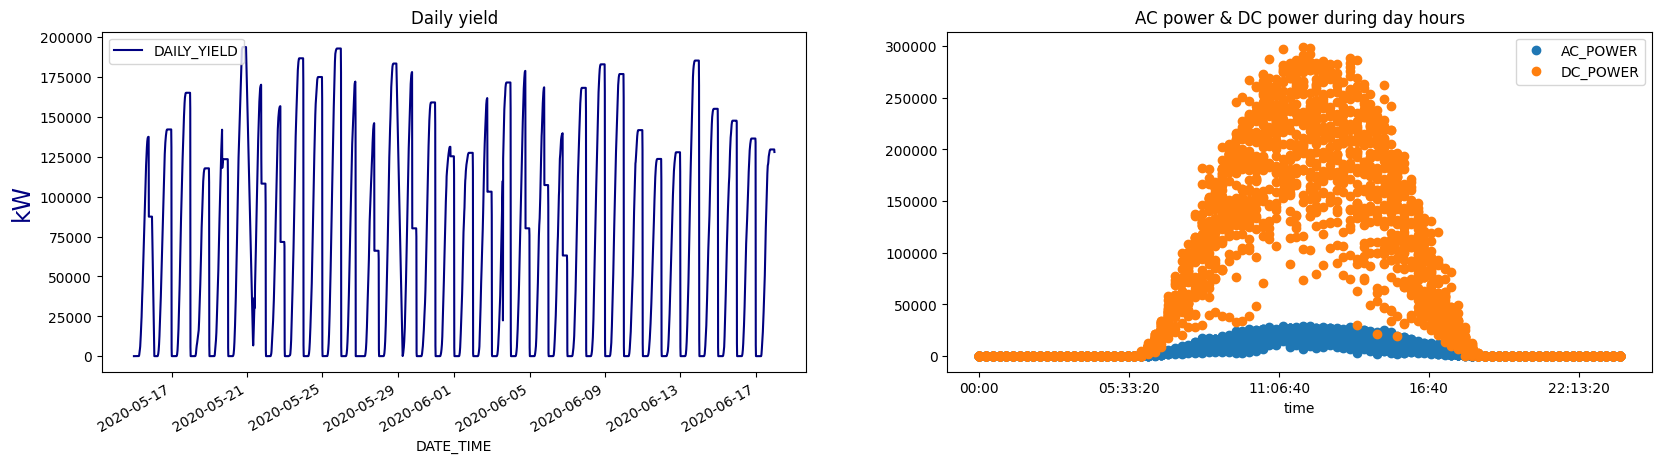

In [90]:
gen_1.dropna(inplace=True)
df_gen=gen_1.groupby('DATE_TIME').sum().reset_index()
df_gen['time']=df_gen['DATE_TIME'].dt.time

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))
# daily yield plot
df_gen.plot(x='DATE_TIME',y='DAILY_YIELD',color='navy',ax=ax[0])
# AC & DC power plot
df_gen.set_index('time').drop('DATE_TIME',axis=1)[['AC_POWER','DC_POWER']].plot(style='o',ax=ax[1])

ax[0].set_title('Daily yield',)
ax[1].set_title('AC power & DC power during day hours')
ax[0].set_ylabel('kW',color='navy',fontsize=17)
plt.show()

In [124]:
univariate_df = merged_df.copy()
univariate_df = univariate_df.groupby('DATE_TIME').sum()
univariate_df = univariate_df['DAILY_YIELD'].reset_index()
univariate_df.rename(columns={'DAILY_YIELD': 'y', 'DATE_TIME': 'ds'}, inplace=True)
univariate_df['date_time'] = univariate_df['ds']
univariate_df.set_index('date_time', inplace=True)
univariate_df['unique_id'] = 1
univariate_df.head()



,ds,y,unique_id
date_time,,,
2020-05-15 00:00:00,2020-05-15 00:00:00,0.0,1
2020-05-15 00:15:00,2020-05-15 00:15:00,0.0,1
2020-05-15 00:30:00,2020-05-15 00:30:00,0.0,1
2020-05-15 00:45:00,2020-05-15 00:45:00,0.0,1
2020-05-15 01:00:00,2020-05-15 01:00:00,0.0,1


In [142]:
multivariate_df = merged_df.groupby('DATE_TIME').agg({
    'DAILY_YIELD': 'sum',
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean',
    'IRRADIATION': 'mean'
}).reset_index()
multivariate_df.rename(columns={'DAILY_YIELD': 'y', 'DATE_TIME': 'ds'}, inplace=True)

multivariate_df['unique_id'] = 1
multivariate_df.head()

,ds,y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,unique_id
0,2020-05-15 00:00:00,0.0,25.184316,22.857507,0.0,1
1,2020-05-15 00:15:00,0.0,25.084589,22.761668,0.0,1
2,2020-05-15 00:30:00,0.0,24.935753,22.592306,0.0,1
3,2020-05-15 00:45:00,0.0,24.846130,22.360852,0.0,1
4,2020-05-15 01:00:00,0.0,24.621525,22.165423,0.0,1


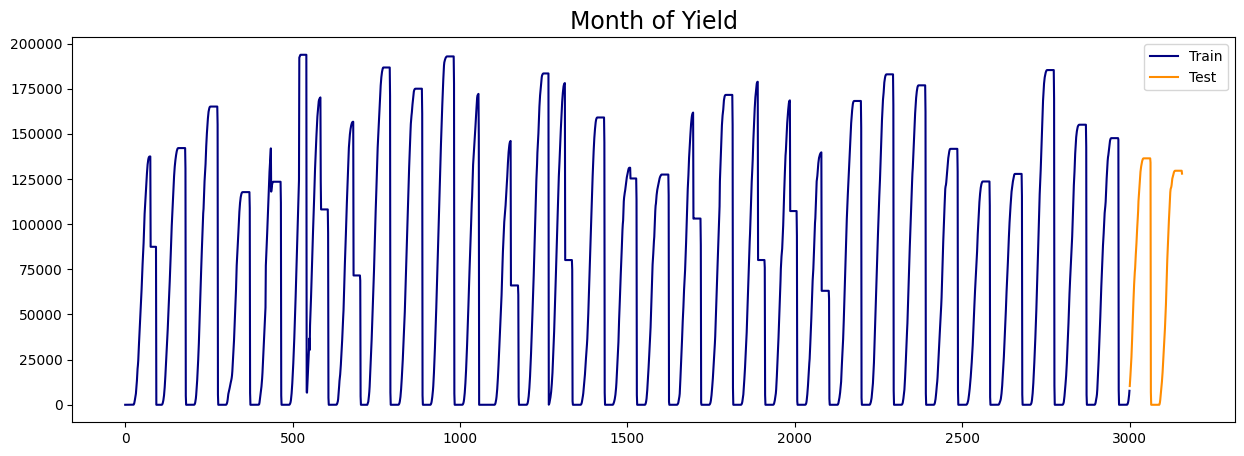

In [143]:
train=multivariate_df[:3000]
test=multivariate_df[3000:]
plt.figure(figsize=(15,5))
plt.plot(train['y'],label='Train',color='navy')
plt.plot(test['y'],label='Test',color='darkorange')
plt.title('Month of Yield',fontsize=17)
plt.legend()
plt.show()

In [144]:
train


,ds,y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,unique_id
0,2020-05-15 00:00:00,0.000000,25.184316,22.857507,0.000000,1
1,2020-05-15 00:15:00,0.000000,25.084589,22.761668,0.000000,1
2,2020-05-15 00:30:00,0.000000,24.935753,22.592306,0.000000,1
3,2020-05-15 00:45:00,0.000000,24.846130,22.360852,0.000000,1
4,2020-05-15 01:00:00,0.000000,24.621525,22.165423,0.000000,1
...,...,...,...,...,...,...
2995,2020-06-16 07:00:00,1353.714286,23.138751,24.801971,0.101726,1
2996,2020-06-16 07:15:00,2338.607143,23.254846,25.770913,0.167161,1
2997,2020-06-16 07:30:00,3793.625000,23.595815,28.376148,0.206391,1
2998,2020-06-16 07:45:00,5398.928571,23.800503,29.756976,0.258267,1


## Multivariate

In [168]:
from neuralforecast import NeuralForecast
from neuralforecast.models import LSTM, NHITS, RNN, NBEATS

input_size = 48
h = 96  # 1 DAY
max_steps = 50 
exogenous_variables = ['IRRADIATION','MODULE_TEMPERATURE','AMBIENT_TEMPERATURE']
models = [
    NBEATS(
        input_size=input_size, h=h, 
        max_steps=max_steps,
        hist_exog_list = exogenous_variables,
        scaler_type = 'robust'),
    LSTM(input_size=input_size,
        h=h,
        max_steps=max_steps,
        hist_exog_list = exogenous_variables, 
        scaler_type = 'robust'
        ),
    NHITS(input_size=input_size,
        h=h,
        max_steps=max_steps,
        hist_exog_list = exogenous_variables, 
        scaler_type = 'robust'
        ),
    RNN(input_size=input_size,
        h=h,
        max_steps=max_steps,
        hist_exog_list = exogenous_variables, 
        scaler_type = 'robust'
        )
]

nf = NeuralForecast(models=models, freq='15T')
nf.fit(df=train)

predictions = nf.predict()


Seed set to 1
Seed set to 1
Seed set to 1
Seed set to 1


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 25.18it/s]


In [169]:
subset_columns = ['NBEATS', 'LSTM', 'RNN','NHITS'] 
predictions['ensemble'] = (predictions['NBEATS'] + predictions['LSTM'] + predictions['RNN'] + predictions['NHITS']) / 4


In [171]:
predictions

,ds,NBEATS,LSTM,NHITS,RNN,ensemble
unique_id,,,,,,
1,2020-06-16 08:15:00,12471.732422,29391.175781,10874.985352,5633.539062,14592.858154
1,2020-06-16 08:30:00,15054.850586,27716.796875,17071.964844,2550.109375,15598.430420
1,2020-06-16 08:45:00,14237.718750,28632.667969,17834.638672,11770.421875,18118.861816
1,2020-06-16 09:00:00,22655.673828,30118.226562,22095.496094,11027.398438,21474.198730
1,2020-06-16 09:15:00,25881.500000,28112.261719,24631.482422,9247.992188,21968.309082
...,...,...,...,...,...,...
1,2020-06-17 07:00:00,3119.497559,23215.093750,167.311401,10542.367188,9261.067474
1,2020-06-17 07:15:00,2148.793457,26044.203125,2913.085205,8901.292969,10001.843689
1,2020-06-17 07:30:00,5575.676270,21404.613281,4349.462402,14594.976562,11481.182129


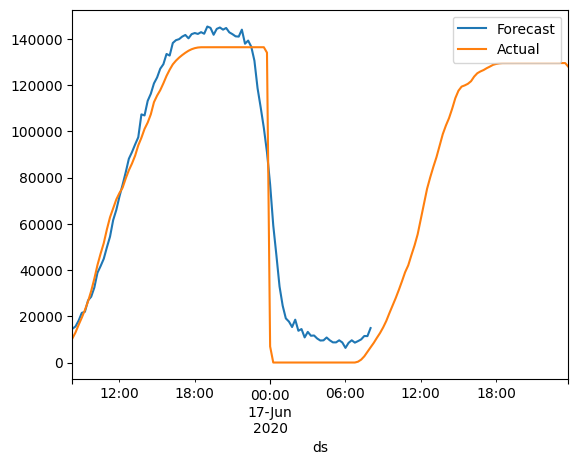

In [172]:
import matplotlib.pyplot as plt



predictions.plot(x='ds', y='ensemble', kind='line', label='Forecast', ax=plt.gca())

test.plot(x='ds', y='y', kind='line', label='Actual', ax=plt.gca())

plt.show()


In [173]:
import numpy as np

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

columns = ['NBEATS', 'LSTM', 'NHITS', 'RNN']
for column in columns:
    predictions[column + '_smape'] = predictions.apply(lambda x: smape(test['y'], x[column]), axis=1)

predictions


,ds,NBEATS,LSTM,NHITS,RNN,ensemble,NBEATS_smape,LSTM_smape,NHITS_smape,RNN_smape
unique_id,,,,,,,,,,
1,2020-06-16 08:15:00,12471.732422,29391.175781,10874.985352,5633.539062,14592.858154,150.008616,120.590007,153.956382,170.079396
1,2020-06-16 08:30:00,15054.850586,27716.796875,17071.964844,2550.109375,15598.430420,144.265162,122.835342,140.201538,182.939557
1,2020-06-16 08:45:00,14237.718750,28632.667969,17834.638672,11770.421875,18118.861816,146.034495,121.599689,138.732255,151.728629
1,2020-06-16 09:00:00,22655.673828,30118.226562,22095.496094,11027.398438,21474.198730,130.355693,119.628976,131.268696,153.574728
1,2020-06-16 09:15:00,25881.500000,28112.261719,24631.482422,9247.992188,21968.309082,125.441632,122.296539,127.286625,158.417209
...,...,...,...,...,...,...,...,...,...,...
1,2020-06-17 07:00:00,3119.497559,23215.093750,167.311401,10542.367188,9261.067474,180.336210,129.478213,197.643983,154.806151
1,2020-06-17 07:15:00,2148.793457,26044.203125,2913.085205,8901.292969,10001.843689,184.972634,125.203184,181.251298,159.408300
1,2020-06-17 07:30:00,5575.676270,21404.613281,4349.462402,14594.976562,11481.182129,170.294566,132.402408,175.046696,145.258262


In [174]:
from tsfresh import extract_features
extracted_features = extract_features(train, column_id="unique_id", column_sort="ds")

extracted_features

Feature Extraction: 100%|██████████| 4/4 [00:10<00:00,  2.60s/it]


,y__variance_larger_than_standard_deviation,y__has_duplicate_max,y__has_duplicate_min,y__has_duplicate,y__sum_values,y__abs_energy,y__mean_abs_change,y__mean_change,y__mean_second_derivative_central,y__median,...,AMBIENT_TEMPERATURE__fourier_entropy__bins_5,AMBIENT_TEMPERATURE__fourier_entropy__bins_10,AMBIENT_TEMPERATURE__fourier_entropy__bins_100,AMBIENT_TEMPERATURE__permutation_entropy__dimension_3__tau_1,AMBIENT_TEMPERATURE__permutation_entropy__dimension_4__tau_1,AMBIENT_TEMPERATURE__permutation_entropy__dimension_5__tau_1,AMBIENT_TEMPERATURE__permutation_entropy__dimension_6__tau_1,AMBIENT_TEMPERATURE__permutation_entropy__dimension_7__tau_1,AMBIENT_TEMPERATURE__query_similarity_count__query_None__threshold_0.0,AMBIENT_TEMPERATURE__mean_n_absolute_max__number_of_maxima_7
1,1.0,1.0,1.0,1.0,2.140460e+08,2.853600e+13,3411.552005,2.578455,0.389236,65680.330357,...,0.090729,0.136002,0.361435,1.40409,2.187742,3.013736,3.80305,4.474604,NaN,34.861336


In [175]:
# from tsfresh.utilities.dataframe_functions import roll_time_series
# df_rolled = roll_time_series(train, column_id="unique_id", column_sort="ds",min_timeshift=192,rolling_direction=10)

In [176]:
import pandas as pd

# To split the DataFrame into a list of DataFrames for each day:
day_series = [group for _, group in train.groupby(train.index.date)]

len(day_series)

AttributeError: 'RangeIndex' object has no attribute 'date'

In [ ]:
from tsfresh import extract_features
df_features = pd.DataFrame()

for df in day_series:
  extracted = extract_features(df, column_id="unique_id", column_sort="ds")
  impute(extracted)
  df_features = pd.concat([df_features, extracted], ignore_index=True)

df_features.reset_index(drop=True, inplace=True)




Feature Extraction: 100%|██████████| 1/1 [00:00<00:00, 13.94it/s]


In [ ]:

# Print the df_features dataframe
df_features.head()

,y__variance_larger_than_standard_deviation,y__has_duplicate_max,y__has_duplicate_min,y__has_duplicate,y__sum_values,y__abs_energy,y__mean_abs_change,y__mean_change,y__mean_second_derivative_central,y__median,...,y__fourier_entropy__bins_5,y__fourier_entropy__bins_10,y__fourier_entropy__bins_100,y__permutation_entropy__dimension_3__tau_1,y__permutation_entropy__dimension_4__tau_1,y__permutation_entropy__dimension_5__tau_1,y__permutation_entropy__dimension_6__tau_1,y__permutation_entropy__dimension_7__tau_1,y__query_similarity_count__query_None__threshold_0.0,y__mean_n_absolute_max__number_of_maxima_7
0,1.0,1.0,1.0,1.0,5.053591e+06,5.072617e+11,2037.858696,950.684783,0.000000,51726.053571,...,0.205471,0.205471,0.205471,0.120874,0.182765,0.245655,0.309567,0.374524,0.0,137053.423470
1,1.0,1.0,1.0,1.0,6.699905e+06,8.337785e+11,1763.781609,1503.206897,-65.901163,85944.473216,...,0.106566,0.212627,0.318171,0.063355,0.063962,0.064581,0.065214,0.065861,0.0,142114.000000
2,1.0,1.0,1.0,1.0,7.804065e+06,1.125924e+12,1895.944361,1579.971429,-27.620821,83677.997024,...,0.198822,0.198822,0.198822,0.117714,0.118748,0.119801,0.120874,0.121969,0.0,165106.000000
3,1.0,1.0,1.0,1.0,5.130290e+06,5.261030e+11,1392.471805,1086.222932,-16.927242,33803.571429,...,0.198822,0.198822,0.297586,0.117714,0.118748,0.119801,0.120874,0.121969,0.0,117738.000000
4,1.0,0.0,1.0,1.0,5.896321e+06,6.723914e+11,2060.423331,1144.018051,-27.932987,53828.666665,...,0.205471,0.205471,0.307502,0.210787,0.273166,0.336542,0.400939,0.466380,0.0,132335.956633


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, InputLayer

# Define the model
model = Sequential([
    InputLayer(input_shape=(788,)), 
    Dense(128, activation='relu'),   
    Dense(64, activation='relu'),    
    Dense(32, activation='relu'),   
    Dense(4, activation='softmax')   
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Model summary
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100992    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 111460 (435.39 KB)
Trainable params: 111460 (435.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from sklearn.cluster import KMeans

# Create an instance of KMeans with 4 centroids
kmeans = KMeans(n_clusters=4)

# Fit the model to the data
kmeans.fit(df_features)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Print the cluster labels
print(labels)




[1 1 0 1 1 0 0 1 2 0 2 1 1 2 0 0 1 1 1 0 1 1 1 0 2 0 1 1 1 2 0 1 3]
